<a href="https://colab.research.google.com/github/nvyas1-git/TestRepo/blob/main/ShopifyQuestion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


___Exploratory Analysis:___
- The feature 'order_amount' was total amount of sneakers bought together, so dividing the order_amount by 'total_item' was required. 
- Dividing the 'order_amount' by 'total_item', can not be a good practice because what if one sneaker is very expensive but other is very cheap. The grouping of sneakers by the brand can be done. In this data, the brands are not specified so calcutaing the 'order_amount' by dividing it with 'total_item'
- The average order value (AOV) of the order_amount for 5000 sneakers is 3145.
- Only 46 out of 5000 sneakers has the order_amount greater than 388.
- Majority of sneakers fall in the range of 90 - 170.

___Conclusion:___
- Since 75% of the population ranges from 90 - 170, the median metric is preferable central tendency point. 
- Average (Mean) can be used when the sneakers are grouped by brands.
- Further, checking the distrubution, the analysis can also be done by segmenting the sneakers into three categories (Lower, Middle, Higher) and then their average can give us a clear picture.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ordersDf = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
ordersDf.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# Not affecting the raw data
ordersDf_new = ordersDf

In [5]:
ordersDf_new['actual_order_amount'] = ordersDf_new['order_amount']/ordersDf_new['total_items']

In [6]:
ordersDf_new['actual_order_amount'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: actual_order_amount, dtype: float64

In [7]:
# Getting the number of observation greater than mean
m = ordersDf_new['actual_order_amount'].mean()
num = ordersDf_new[ordersDf_new.actual_order_amount>m].shape[0]
print('Observations greater than AOV: ', num)

Observations greater than AOV:  46


__Only 46 out of 50000 orders has the order value greater than mean (387.74).___

__Checking the distribution of order value throughout the dataset__

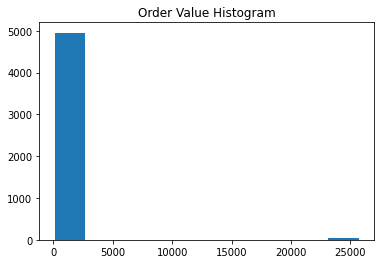

In [8]:
plt.title('Order Value Histogram')
plt.hist(ordersDf_new['actual_order_amount'])
plt.show()

__Clearly we can see some outliers, checking the distribution without the outliers.__

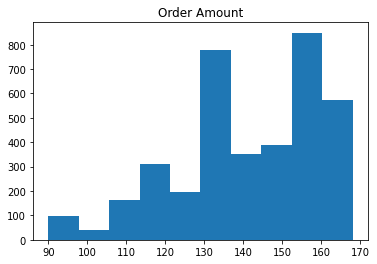

In [9]:
quantile75_value = 169
#ordersDf_amt = 
plt.title('Order Amount')
plt.hist(ordersDf_new.where(ordersDf_new['actual_order_amount']<quantile75_value)['actual_order_amount'])
plt.show()

___Checking this distribution, it is seen that majority of sneakers are falling in the range 130 - 170.___

__We can check the brands or sneaker company of the sneakers which have the value more than mean. Maybe these sneakers belong to very expensive brands.__